# Week 9: Homework 3

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

The aim of this HW is to analyse the performance of SVMs with different cofigurations (different kernels and parameters), as well as different approaches to combine the SMV training with a feature selection stage. As in the previous homework, we will work with the Breast Cancer database.

Let's start loading and preparing the data and, next, complete the given exercises.

### Exercise 1. Load and prepare the data

As you already know, the  [Breast cancer data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) is a binary classification problem aimed to detect breast cancer from a  digitized image of breast mass characterized with 30 input features describing the mass.

Complete next cell code, so that you can:
* Load the dataset
* Create training and testing partitions with the 60% and 40% of the original data
* Normalize the data to zero mean and unitary standard deviation 

### Solution

In [2]:
# <SOL>

import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline

# Initialize the random generator seed to compare results
 # si los resultados estan ordenados, como en el caso del irish dataset, los desordenamos usando una semilla aleatoria, para que el modelo entrene con todas las
# diferentes caracteristicas posibles
np.random.seed(0)


# Cargamos los datos
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,test_size=0.4,random_state=109)
X = cancer.data
Y = cancer.target


# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"\n Transformador de datos con media 0 y varianza 1: \n{scaler}")

#X_train = preprocessing.scale(X_train)
print(f"\n Datos normalizados media: \n {X_train.mean(axis=0)}")
print(f"\n Datos normalizados varianza: \n {X_train.std(axis=0)}")

#X_test=X_test.preprocessing.scale(X_train)

print(f"\nVariables de salida \n{cancer.target_names}")
print(f"\nLista de caracteristicas del dataset \n{cancer.feature_names}")
print(f"\nTamaño del conjunto de datos \n{cancer.data.shape,cancer.target.shape}")
print(f"\nTamaño del conjunto de datos de entrenamiento \n{X_train.shape,y_train.shape}")
print(f"\nTamaño del conjunto de datos de test \n{X_test.shape,y_test.shape}")
print(f"\nDatos de entrenamiento normalizados \n{X_train}")
print(f"\nDatos de test normalizados \n{X_test}")


# </SOL>


 Transformador de datos con media 0 y varianza 1: 
StandardScaler(copy=True, with_mean=True, with_std=True)

 Datos normalizados media: 
 [-4.00852372e-15  1.51068470e-15 -1.00180535e-15 -7.20831020e-16
  5.32809378e-16 -1.02492143e-15 -7.15703157e-16 -8.53015931e-17
  4.91558570e-15  2.24974812e-15  9.50689511e-16  5.66506763e-17
 -6.81761588e-16  4.98135257e-17 -6.12698227e-16  9.41573310e-16
  5.06437512e-16 -1.24826835e-15 -9.52642982e-16  3.87438534e-17
 -2.82374319e-15  2.95511416e-15 -8.99248092e-16 -1.14961804e-15
  7.18356622e-15 -1.79572877e-15 -3.33473881e-16 -8.20458071e-17
  2.60137301e-16  1.71579922e-15]

 Datos normalizados varianza: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

Variables de salida 
['malignant' 'benign']

Lista de caracteristicas del dataset 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fra

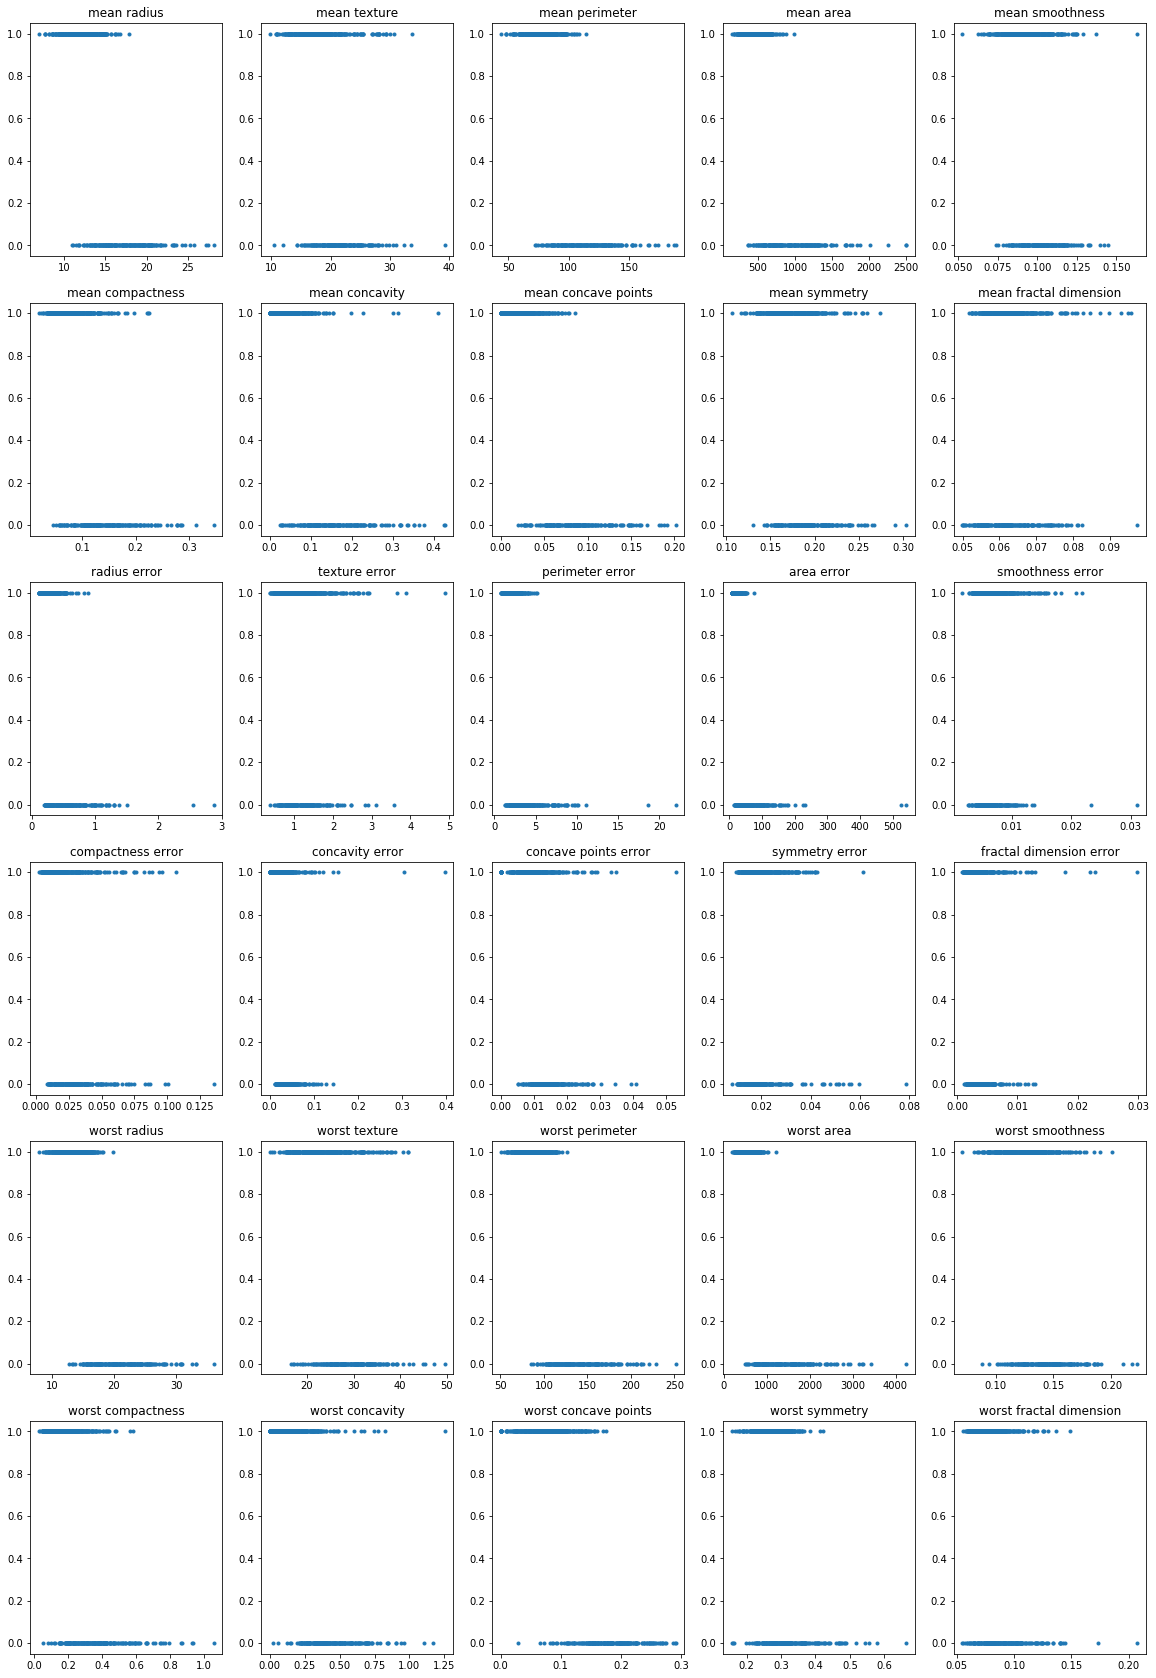

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# cargamos los nombres de las caracteristicas
feature_names = cancer.feature_names
names = cancer["feature_names"]

# pintamos el numero de evidencias que hay en los datos

D = X.shape[1] # cogemos la segunda posicion de la dimension de la matriz 442

plt.figure( figsize=(20,30))

for d in range (D):
  plt.subplot(6,5,d+1)
  plt.plot(cancer.data [:,d],cancer.target,'.',)
  plt.title(feature_names[d])

In [4]:

print("Caracteristicas: \n ", cancer.feature_names)

print("Objetivo: \n", cancer.target_names)
#cancer.data.shape

Caracteristicas: 
  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Objetivo: 
 ['malignant' 'benign']


### Exercise 2. Analysis of SVM performance

The goal of Exercise 2 is to design the best possible SVM. So, please, check different configurations (kernels, parameters, ...) and select the configuration with better generalization capabilities. 

Be careful with the kind of analysis that you carry out. In case you only want to compare different configurations (either different kernels or different multiclass approaches), you can get the final test performance, for each configuration, and compare them. But, in case you want to select the best possible configuration (for example, either I should use a linear kernel or a RBF one), you have to use an accuracy score over a validation partition (or a cross-validation) process. 

### Solution

## Creacion y evaluacion de los clasificadores
Se hara de dos maneras:

1.    Creando clasificadores independientes con diferentes parametros de C, gamma y kernel, traves de un objeto GridSearchCV(), donde se evaluara todo a la vez y el propio objeto nos dara los mejores resultados.

2.   Creando clasificadores simples con diferentes configuraciondes de kernel y valores de C y gamma



En ambos se usara la validacion cruzada

### 1. GridSearchCV()
En primer lugar se usara el enfoque del objeto GridSearchCV(). Se crean 3 objetos, uno para cada tipo de Kernel $Linear$,$Poly$ y $RBF$ a dichos objetos se le pasara como parametro un diccionario con los diferentes rangos de los valores C y Gamma.

Cada uno de los clasificadores nos devuelve la configuracion optima para el cual se consigue la mayor precision a traves del uso de la herramienta $Cross$ $Validation$ con un valor de $5$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [6]:
# TODO: definir bien los parametros gamma y degree

C_range = np.logspace(-3,3, num=30)
gamma_range = np.logspace(-3,3, num=30)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=42)

grid = GridSearchCV(SVC(kernel='linear'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print("Los mejores parametros para un kernel lineal (linear) son: \n %s \n con un valore de precision de  %0.2f \n" % (grid.best_params_, grid.best_score_))

grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print("Los mejores parametros para un kernel polykernel (poly) son: \n %s \n con un valore de precision de %0.2f \n" % (grid.best_params_, grid.best_score_))

grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print("Los mejores parametros para un kernel Radial Basis Function (RBF) son: \n %s \n con un valore de precision de %0.2f \n" % (grid.best_params_, grid.best_score_))


Los mejores parametros para un kernel lineal (linear) son: 
 {'C': 0.18873918221350977, 'gamma': 0.001} 
 con un valore de precision de  0.96 

Los mejores parametros para un kernel polykernel (poly) son: 
 {'C': 0.001, 'gamma': 1.2689610031679222} 
 con un valore de precision de 0.94 

Los mejores parametros para un kernel Radial Basis Function (RBF) son: 
 {'C': 5.298316906283707, 'gamma': 0.02807216203941177} 
 con un valore de precision de 0.96 



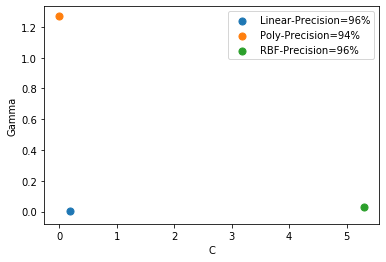

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

C_list = []
Gamma_list = []

plt.figure()
plt.scatter(0.18873918221350977,0.001,s=50, label='Linear-Precision=96%')
plt.scatter(0.001,1.2689610031679222,s=50, label='Poly-Precision=94%')
plt.scatter(5.298316906283707,0.02807216203941177,s=50, label='RBF-Precision=96%')

plt.legend()
plt.xlabel('C')
plt.ylabel('Gamma')

plt.show()

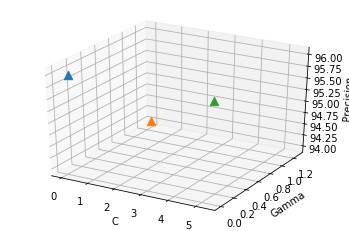

In [30]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(0.18873918221350977,0.001, 96, marker=m, s=70)
ax.scatter(0.001,1.2689610031679222, 94, marker=m, s=70)
ax.scatter(5.298316906283707,0.02807216203941177, 96, marker=m, s=70)

#plt.scatter(0.18873918221350977,0.001,s=50, label='Linear')
#plt.scatter(0.001,1.2689610031679222,s=50, label='Poly')
#plt.scatter(5.298316906283707,0.02807216203941177,s=50, label='RBF')

ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Precision')

plt.show()

### Resultados GridSeachCV
En este caso obtenemos los siguientes resultados para los diferentes Kernels segun la busqueda que realiza el clasificador:


*   Para el kernel $Linear$, se obtiene un valor de $Precision=96$% y los parametros optimos son $C=0.18873918221350977$ y $\gamma=0.001$
*   Para el kernel $Poly$, se obtiene un valor de $Precision=94$% y los parametros optimos son $C=0.001$ y $\gamma=1.2689610031679222$
* Para el kernel $RBF$, se obtiene un valor de $Precision=96$% y los parametros optimos son $C=0.5.298316906283707$ y $\gamma=0.02807216203941177$

Teniendo en cuenta que se han definido los parametros tanto $C$ como $\gamma$ en un rango de ($10e-3$ , $10e-3$). Podemos concluir que los clasificadores que usan kernels lineal y RBF obtienen el mejor de los resultados para este caso $96$%. 

No obstante, el clasificador con el Kernel $RBF$ es el mas fiable de los dos debido a que sus parametros no se quedan en los limites ni inferior ni superior de los valores definidos para estos. Es decir, con ambos Kernels se obtiene el mismo valor de precision, pero el kernel $lineal$, obtiene su mejor resultado  para un valor de $\gamma=0.001$, el cual coincide con el valor minimo definido para este parametro. Asi que se puede intuir que  si el parametro $\gamma$ tomase valores inferiores a $0.001$, la precision cambiaria. 

Basandonos en esta premisa, el clasificador optimo es el $RBF$, ya que obtiene su mejor valor de precision con unos valoores para los parametros que estan mas centrados en el rango de $C$ y $\gamma$ que recibe.




### 2. Clasificadores Aislados
En las siguientes celdas de codigo se realizara el mismo analisis que en las celdas anteriores, con los mismos valores de $C$,$\gamma$ y los mismos $kernels$ pero esta vez, crearemos clasificadores individuales para cada uno de los diferentes valores.

Finalmente, buscaremos entre los clasificadores el que mayor precision obtenga y analizaremos los valores de $C$ y $\gamma$. 

Una vez realizado este analisis, se cogeran los valores optimos de $C$ y $\gamma$ y se crearan 3 clasificadores aislados nuevos, con estos parametros predefinidos y usando Cross Validation para ver si el resultado es similar.

In [0]:
from sklearn import metrics

C_range = np.logspace(-3,3, num=30)
gamma_range = np.logspace(-3,3, num=30)

kernels =['linear', 'poly', 'rbf']
classifiers = []

for kernel in kernels:
  for C in C_range:
    for gamma in gamma_range:
        clf = SVC(kernel = kernel, C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))



In [0]:
contador = 1
precision = []
for classifier in classifiers:
  #print(f" \nParametros del clasificador {contador} \n {classifier}")
  clf = classifier[2]
  y_pred = clf.predict(X_test)
  #print(f"\n Accuracy: \n {metrics.accuracy_score(y_test, y_pred)*100}%")
  precision.append(metrics.accuracy_score(y_test, y_pred)*100)
  #print(f"\n Matriz de confusion: \n {confusion_matrix(y_test,y_pred)}")
  #print(f"\n Reporte: \n {classification_report(y_test,y_pred)}")

  contador=contador+1



In [9]:
# cogemos el clasificador conmayor precision
index = precision.index(max(precision))

# el mejor clasificador 
clf = classifiers[0]
clf=clf[2]
print(clf)
print(precision[index])

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
97.80701754385966


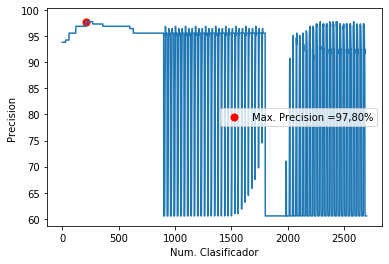

In [51]:
plt.figure()
plt.plot(range(1,len(precision)+1),precision)
plt.scatter(index,precision[index],c='r',s=50, label='Max. Precision =97,80%')
#plt.scatter(5.298316906283707,0.02807216203941177,s=50, label='RBF-Precision=96%')

plt.legend()
plt.xlabel('Num. Clasificador')
plt.ylabel('Precision')

plt.show()

In [0]:
# con cross validation para un clasificador simple
from sklearn.model_selection import cross_val_score

# si extraemos los valores de C y gamma del ejemplo de arriba
C= 0.001
gamma= 0.001

clf_linear = SVC(kernel='linear', C=C, gamma=gamma)
clf_poly = SVC(kernel='poly', C=C, gamma=gamma)
clf_rbf = SVC(kernel='rbf', C=C, gamma=gamma)


scoresLinear = cross_val_score(clf_linear, X, Y, cv=10)
scoresPoly = cross_val_score(clf_poly, X, Y, cv=10)
scoresRBF = cross_val_score(clf_rbf, X, Y, cv=10)



In [35]:
print(f"\nLos resultados del CV para un SVM con kernel lineal son: \n {scoresLinear} ")
print("\nY una precision de: %0.2f (+/- %0.2f)" % (scoresLinear.mean(), scoresLinear.std() * 2))

print(f"\nLos resultados del CV para un SVM con kernel polinomial son: \n {scoresPoly} ")
print("\nY una precision de: %0.2f (+/- %0.2f)" % (scoresPoly.mean(), scoresPoly.std() * 2))

print(f"\nLos resultados del CV para un SVM con kernel Radial Basis Function son: \n {scoresRBF} ")
print("\nY una precision de: %0.2f (+/- %0.2f)" % (scoresRBF.mean(), scoresRBF.std() * 2))



Los resultados del CV para un SVM con kernel lineal son: 
 [0.9137931  0.9137931  0.94736842 0.94736842 1.         0.98245614
 0.92982456 0.89285714 0.92857143 0.94642857] 

Y una precision de: 0.94 (+/- 0.06)

Los resultados del CV para un SVM con kernel polinomial son: 
 [0.98275862 0.9137931  0.9122807  0.92982456 0.96491228 0.98245614
 0.94736842 0.94642857 0.96428571 0.96428571] 

Y una precision de: 0.95 (+/- 0.05)

Los resultados del CV para un SVM con kernel Radial Basis Function son: 
 [0.62068966 0.62068966 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.625      0.625      0.625     ] 

Y una precision de: 0.63 (+/- 0.01)


### Resultados
Para el experimento de los clasificadores simples sin validacion cruzada, se obtiene que el mayor valor de precision, es generado por un clasificador lineal con los siguientes parametros:



*   $C = 0.001$
*   $\gamma=0.001$
* $Kernel=linear$
* $Precision=97.80$

Para los clasificadores con validacion cruzada para los valores predefinidos de $C$ y $\gamma$ variando el tipo de kernel, los resultados de la media de la precision para cada una de las iteraciones de la validacion cruzada son:

* $Precision=94$ y $Kernel=linear$
* $Precision=96$ y $Kernel=Poly$
* $Precision=63$ y $Kernel=RBF$

Como vemos, los resultados para el caso del kernel lineal, no mejoran debido a la validacion cruzada.



In [0]:
# con cross validation para un clasificador simple usando los parametros del grid search
from sklearn.model_selection import cross_val_score

# si extraemos los valores de C y gamma del ejemplo de arriba
C_lin=  0.18873918221350977
gamma_lin= 0.001
C_poly= 0.001
gamma_poly= 1.2689610031679222
C_rbf= 5.298316906283707
gamma_rbf= 0.02807216203941177


clf_linear_GS = SVC(kernel='linear', C=C_lin, gamma=gamma_lin)
clf_poly_GS = SVC(kernel='poly', C=C_poly, gamma=gamma_poly)
clf_rbf_GS = SVC(kernel='rbf', C=C_rbf, gamma=gamma_rbf)


scoresLinear_GS = cross_val_score(clf_linear_GS, X, Y, cv=10)
scoresPoly_GS = cross_val_score(clf_poly_GS, X, Y, cv=10)
scoresRBF_GS = cross_val_score(clf_rbf_GS, X, Y, cv=10)

In [0]:
print(f"\nLos resultados del CV para un SVM con kernel lineal son: \n {scoresLinear_GS} ")
print("\nY una precision de: %0.2f (+/- %0.2f)" % (scoresLinear_GS.mean(), scoresLinear_GS.std() * 2))

print(f"\nLos resultados del CV para un SVM con kernel polinomial son: \n {scoresPoly_GS} ")
print("\nY una precision de: %0.2f (+/- %0.2f)" % (scoresPoly_GS.mean(), scoresPoly_GS.std() * 2))

print(f"\nLos resultados del CV para un SVM con kernel Radial Basis Function son: \n {scoresRBF_GS} ")
print("\nY una precision de: %0.2f (+/- %0.2f)" % (scoresRBF_GS.mean(), scoresRBF_GS.std() * 2))

In [0]:
#contador = 1
#precision = []
#for classifier in classifiers:
  #print(f" \nParametros del clasificador {contador} \n {classifier}")
  #clf = classifier[2]
  #y_pred = clf.predict(X_test)
  #print(f"\n Accuracy: \n {metrics.accuracy_score(y_test, y_pred)*100}%")
  #precision.append(metrics.accuracy_score(y_test, y_pred)*100)
  #print(f"\n Matriz de confusion: \n {confusion_matrix(y_test,y_pred)}")
  #print(f"\n Reporte: \n {classification_report(y_test,y_pred)}")
  
  # Cross Validation
  #scores = cross_val_score(clf, X, Y, cv=5)
  #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  #contador=contador+1

### Exercise 3. Feature selection with SVM
Now, let's analyze two approaches for feature selection with SVMs:

#### 1. L1-regularized SVM

In this first case, you have to train a linear SVM regularized with a L1 or LASSO penalty. As you know, this constrain is able to provide sparsity over the weight vector; so, those input features associated to the zeros of the weight vector are not used during the classification process and we obtain an automatic feature selection. 

Note that, if we change the SVM formulation replacing the L2 regularization by a L1, the feature selection is obtained during the SVM training, so both stages (feature selection and classifier training) are completely linked and, therefore, the selection process is guided by the classifier. For this reason this kind of feature selection method is classified as an **embedded feature selector**. 

The only limitation of this approach, as other L1 based feature selection, relies in having to be applied over linear versions of the method, since the sparsity is forced over the vector weights ${\bf w}$. 

#### 2. Recursive Feature Elimination (RFE)

The Recursive Feature Elimination (RFE) method iteratively trains a set of SVM classifiers and, in each step, it eliminates a feature (or a subset of features) in such a way that the classification margin is reduced the least. 

This method is known as a **wrapper approach**, since it iteratively trains a SVM and evaluates its margin to decide which feature can be eliminated.

However, unlike L1-SVM,  this method can be applied over the kernelized version of the SVM, providing a feature selection strategy for both linear and non-linear SVMs.

**References**

[1] Guyon, I., Weston, J., Barnhill, S., & Vapnik, V., “Gene selection for cancer classification using support vector machines”, Mach. Learn., 46(1-3), 389–422, 2002.



### Exercise 3.1 L1-SVM

Analyze the properties of the L1-SVM as feature selection approach. For this purpose, use the linear SVM implementation given by the method [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html), which directly let's select the regularization type (L1 or L2) to be used.

Unlike other feature selection methods, here we cannot obtain a ranking of variables. In this case, we have to sweep the value of the regularization parameter in order to get a higher (or lower) sparsity of the weight vector. According to this, train a linear L1-SVM for different values of the regularization parameter and, for each value of C, analyze the test accuracy, as well as the number of used features. 

Later, try to plot the accuracy vs. the number of features. Note that different values of C can provide the same number of features with different accuracies, so take care of this for this representation. In case you want to obtain the optimum working point, remember to compute a validation error to select the optimum value of C.

Finally, don't forget to analyze the obtained results.



### Solution

## Solucion Clasificadore Simples
En este ejercicio de nuevo realizaremos una solucion con clasificadores simples y un rango de $C$ igual al de los anteriores ejercicios. Generando de nuevo un clasificador por cada valor de $C$. Finalmente nos quedaremos con el clasificador que mejor precision obtenga y analizaremos su valor de $C$ y sus caracterisitcas mas relevantes.

Esta vez el clasificador usara la regularizacion $L_{1}$.

In [64]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

C_range = np.logspace(-3,3, num=30)

precision = []
modelos = []

for C in C_range:
  #clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False,tol=1e-3,C=C)
  clf = LinearSVC(penalty='l1',  verbose=1, dual=False, random_state=0, C=C, max_iter=10000)

  clf.fit(X_train,y_train)
  y2_LSVC_model = clf.predict(X_test)
  modelos.append(clf)
  precision.append(accuracy_score(y_test, y2_LSVC_model))

# cogemos el clasificador conmayor precision
index = precision.index(max(precision))
clas = modelos[index]
print(clas)
print(clas.coef_)
print(precision[index])



[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]LinearSVC(C=0.02807216203941177, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=10000, multi_class='ovr', penalty='l1', random_state=0,
          tol=0.0001, verbose=1)
[[ 0.         -0.01856714  0.          0.          0.          0.
   0.         -0.29088099  0.          0.         -0.10341722  0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.4936119  -0.16589454 -0.05309853  0.
  -0.01582267  0.         -0.052548   -0.16016103 -0.06302265  0.        ]]
0.9824561403508771


In [71]:

print("\n Vector de Pesos 'w' de las caracteristicas")
print(clas.coef_)
print("\nCaracteristicas usadas:")
print(len(clas.coef_[clas.coef_!=0]))
print("\nCaracteristicas usadas en orden de relevancia:")
print((-clas.coef_[clas.coef_!=0]).argsort())
print("\nCaracteristicas no usadas:")
print(np.transpose(np.argwhere(clas.coef_ == 0))[1,:])


 Vector de Pesos 'w' de las caracteristicas
[[ 0.         -0.01856714  0.          0.          0.          0.
   0.         -0.29088099  0.          0.         -0.10341722  0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.4936119  -0.16589454 -0.05309853  0.
  -0.01582267  0.         -0.052548   -0.16016103 -0.06302265  0.        ]]

Caracteristicas usadas:
10

Caracteristicas usadas en orden de relevancia:
[6 0 7 5 9 2 8 4 1 3]

Caracteristicas no usadas:
[ 0  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19 23 25 29]


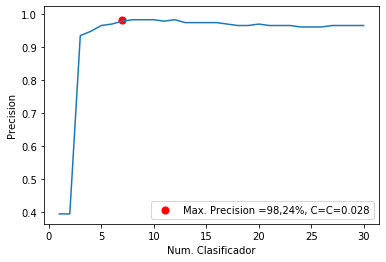

In [66]:
plt.figure()
plt.plot(range(1,len(precision)+1),precision)
plt.scatter(index,precision[index],c='r',s=50, label='Max. Precision =98,24%, C=C=0.028')
#plt.scatter(5.298316906283707,0.02807216203941177,s=50, label='RBF-Precision=96%')

plt.legend()
plt.xlabel('Num. Clasificador')
plt.ylabel('Precision')

plt.show()

In [0]:
## TODO: variables vs C y accuracy

## variabes vs c y accuracy vs C
## combinar las graficas accuracy vs variables 

### Resultado Clasificadores Simples

Para un clasificador con $Kernel=Linear$ y usando la regularizacion $L_{1}$ podemos concluir que los parametros optimos son:
* $C=0.0028$
* Obteniendo una $Precision=98,24$%

La precision es la mayor obtenida hasta ahora despues de todos los clasificadores, como podemos observar con el valor de $C$, al igual que en el ejercicio 1, no se llega a quedar en el limite inferior, aunque si se queda cerca.

Por otro lado, analizamos las caracterisitcas. Segun el vector de coeficientes, que se ha mostrado en celdas anteriores, si quitamos los pesos **w** iguales a cero, obtenemos los siguientes resultados:
* Numero de caracteristicas usadas: 10

* Caracteristicas usadas en orden de relevancia: [6 0 7 5 9 2 8 4 1 3]

* Caracteristicas no usadas: [ 0  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19 23 25 29] 

En conclusion, sobre 30 caracteristicas totales, obtenemos un resultado de precision mejor que con los clasificadores creados hasta ahora con un modelo mas simple y con un coste computacional menor, a cambio de usar solo las caracteristicas que son optimas para el modelo, en funcion del vector de pesos **w**

  

### GridSearchCV
Realizaremos exactamente el mismo experimento usando el objeto GridSearchCV() para comparar resultados

In [68]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-3,3, num=30)

parameters = {'C':C_range}

svc = LinearSVC(penalty='l1',  verbose=1, dual=False, random_state=0, C=C, max_iter=10000)

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(cancer.data, cancer.target)
y2_pred = clf.predict(X_test)

print("\nprecision:",accuracy_score(y_test, y2_pred))


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear]
precision: 0.9473684210526315


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [70]:
print("\n Vector de Pesos 'w' de las caracteristicas")
print(clas.coef_)
print("\nCaracteristicas usadas:")
print(len(clas.coef_[clas.coef_!=0]))
print("\nCaracteristicas usadas en orden de relevancia:")
print((-clas.coef_[clas.coef_!=0]).argsort())
print("\nCaracteristicas no usadas:")
print(np.transpose(np.argwhere(clas.coef_ == 0))[1,:])


 Vector de Pesos 'w' de las caracteristicas
[[ 0.         -0.01856714  0.          0.          0.          0.
   0.         -0.29088099  0.          0.         -0.10341722  0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.4936119  -0.16589454 -0.05309853  0.
  -0.01582267  0.         -0.052548   -0.16016103 -0.06302265  0.        ]]

Caracteristicas usadas:
10

Caracteristicas usadas en orden de relevancia:
[6 0 7 5 9 2 8 4 1 3]

Caracteristicas no usadas:
[ 0  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19 23 25 29]


### Resultado GridSearchCV()
En este caso el coste computacional es mayor que con un clasificador simple y por otro lado obtenemos que los pesos de las caracteristicas y las caracteristicas usadas son las mismas, salvo la precision del modelo que disminuye al 94%:

* Numero de caracteristicas usadas: 10

* Caracteristicas usadas en orden de relevancia: [6 0 7 5 9 2 8 4 1 3]

* Caracteristicas no usadas: [ 0  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19 23 25 29] 

### Exercise 3.2 Recursive Feature Elimination (RFE)

To understand the working principles of the RFE method, let's present its pseudocode:
* Start with all the variables selected. Let's define $S=\left\lbrace 1, \ldots, D\right\rbrace $ the set of indexes with the selected features (we start with all of them).

* For $d = 1, \ldots, D$
  * Train a SVM with using the features in $S$
  * Compute $ \displaystyle \Vert {\bf w} \Vert_2^2$ with the training data and using the features in $S$. That is, if ${\bf x}_S$ is the data ${\bf x}$, but limited to the features in $S$, we have to compute:
$$  \Vert {\bf w}_S \Vert_2^2 = \sum_{i=1}^N  \sum_{j=1}^N \alpha^{(i)} \alpha^{(j)} K({\bf x}^{(i)}_S,{\bf x}^{(j)}_S)$$ 

  * For each variable $d' \in S$, built ${\bf x}_{S-d'}= {\bf x}_S \setminus x_{d'}$ and compute $ \displaystyle \Vert {\bf w} \Vert_2^2$ with the data in ${\bf x}_{S-d'}$
$$  \Vert {\bf w}_{S-d'} \Vert_2^2 = \sum_{l=1}^L  \sum_{l'=1}^L \alpha^{(l)} \alpha^{(l')} K({\bf x}^{(l)}_{S-d'},{\bf x}^{(l')}_{S-d'})$$  
  * Remove the feature $d^*$, where 
  $$d^{*} = \underset{d'}{\operatorname{argmin}} \left\lbrace \Vert {\bf w}_S \Vert_2^2 -\Vert {\bf w}_{S-d'} \Vert_2^2 \right\rbrace $$
  * Define $S = S \setminus d^*$
  * Stop when any criteria is reached (a given number of features or a degradation in the SVM performance)

<br>

Starting from this pseudocode, implement the RFE method for a kernelized SVM. Then,  analyze the curve test accuracy vs. number of selected features when a linear kernel and a RBF kernel are used (you can use the default values of $C$ and $\gamma$ ). Finally, don't forget to analyze the obtained results. 


Note: Scikit-Learn provides a function with a full implementation of the RFE method and extend this implementation for any classifier. In fact, this function, [RFE( )](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html), let user select the classifier to consider, the number of selected features (parameter n\_features\_to\_select) and the number of features removed in each step (parameter step).  As result, in parameter .ranking returns the ranking position of the each feature (i.e., .ranking\_[i] corresponds to the ranking position of the i-th feature). However, this implementation is only thought for linear methods (it is quite similar to the pruning scheme for ridge regression used in the first HW). Here, I want you to work with the original version of this method [1] which is specifically proposed for no-linear SMVs; so, you have to implement the given method. Anyway, in case you have time, you can try to compare the proposed RFE method with that of Scikit-Learn.

### Solution

In [0]:
def RFE():
  pass